<a href="https://colab.research.google.com/github/kalistaYeba/Research-/blob/main/Coding_school.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Research question:**

*Which cardiotocographic features are most predictive of fetal health, and how might these features reflect underlying neurological development?*



# **Collums of Data set**
heart rate baseline

accelerations – # of accelerations per second

fetal_movement

uterine_contractions

light_decelerations

severe_decelerations

prolonged_decelerations

abnormal_short_term_variability

mean_value_of_short_term_variability

percentage_of_time_with_abnormal_long_term_variability

mean_value_of_long_term_variability

histogram_width

histogram_min

histogram_max

histogram_number_of_peaks

histogram_number_of_zeroes

histogram_mode

histogram_mean

histogram_median

histogram_variance

histogram_tendency

fetal_health – Target (1: normal, 2: suspect, 3: pathological)

In [8]:
# 1. Import necessary libraries
import pandas as pd

In [9]:
from google.colab import files
uploaded = files.upload()

Saving fetal_health.csv to fetal_health (1).csv


In [10]:
# 2. Load the fetal health dataset
df = pd.read_csv('fetal_health (1).csv')

In [11]:
# 3. View the first 5 rows to understand the structure
print(df.head())

   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

In [12]:
# 4. Check column types and number of non-missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [13]:
# 5. Check for missing data
df.isnull().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


In [14]:
# 6. Look at mean, min, max, etc. for each column
print(df.describe())

       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057               

In [15]:
# 7. Count how many records belong to each fetal health class
print(df['fetal_health'].value_counts())

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


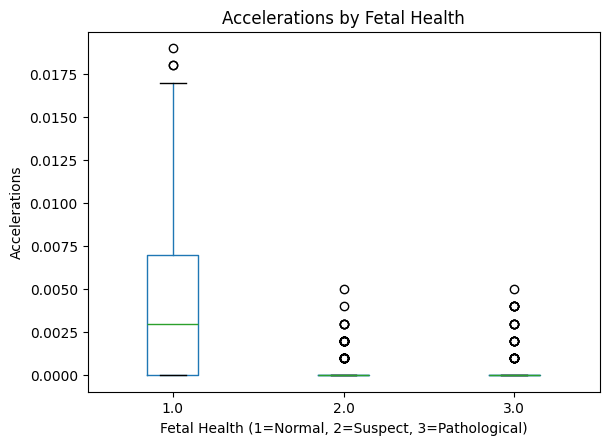

In [16]:
import matplotlib.pyplot as plt
# 8. Visualize how 'accelerations' differ by fetal health class

df.boxplot(column='accelerations', by='fetal_health', grid=False)
plt.title('Accelerations by Fetal Health')
plt.suptitle('')
plt.xlabel('Fetal Health (1=Normal, 2=Suspect, 3=Pathological)')
plt.ylabel('Accelerations')
plt.show()

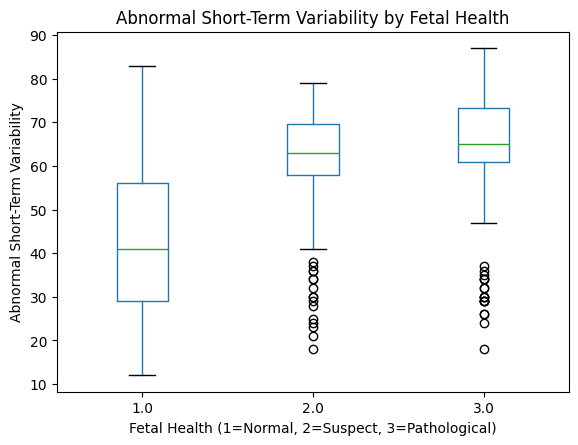

In [17]:
# 9. Visualize how abnormal short-term variability differs by fetal health category

df.boxplot(column='abnormal_short_term_variability', by='fetal_health', grid=False)
plt.title('Abnormal Short-Term Variability by Fetal Health')
plt.suptitle('')
plt.xlabel('Fetal Health (1=Normal, 2=Suspect, 3=Pathological)')
plt.ylabel('Abnormal Short-Term Variability')
plt.show()

# Model Development

In [18]:
# 10. Train a Random Forest model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

In [19]:
# 11. Split the data into features (X) and target (y)
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

In [20]:
# 12. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# 13.Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# 14. Make predictions
rf_preds = rf_model.predict(X_test)

In [23]:
# 15. Print evaluation metrics
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))


Random Forest Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.89      0.77      0.82        64
         3.0       0.90      0.93      0.92        29

    accuracy                           0.95       426
   macro avg       0.92      0.89      0.90       426
weighted avg       0.94      0.95      0.94       426



In [24]:
# 16. Calculate AUC-ROC Score
roc_score_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr')
print("AUC-ROC Score (Random Forest):", roc_score_rf)

AUC-ROC Score (Random Forest): 0.9853105364874084


In [26]:
# 17. Show feature importance from the Random Forest model

import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# 18. Get feature importances and feature names
importances = rf_model.feature_importances_
feature_names = X.columns

In [29]:
# 19. Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [30]:
# 20. Print top 10 important features
print("Top 10 Features by Importance:")
print(feature_importance_df.head(10))

Top 10 Features by Importance:
                                              Feature  Importance
7                     abnormal_short_term_variability    0.135216
8                mean_value_of_short_term_variability    0.108542
9   percentage_of_time_with_abnormal_long_term_var...    0.106369
17                                     histogram_mean    0.097187
16                                     histogram_mode    0.062507
18                                   histogram_median    0.055728
6                            prolongued_decelerations    0.049552
0                                      baseline value    0.048031
10                mean_value_of_long_term_variability    0.046369
1                                       accelerations    0.046229


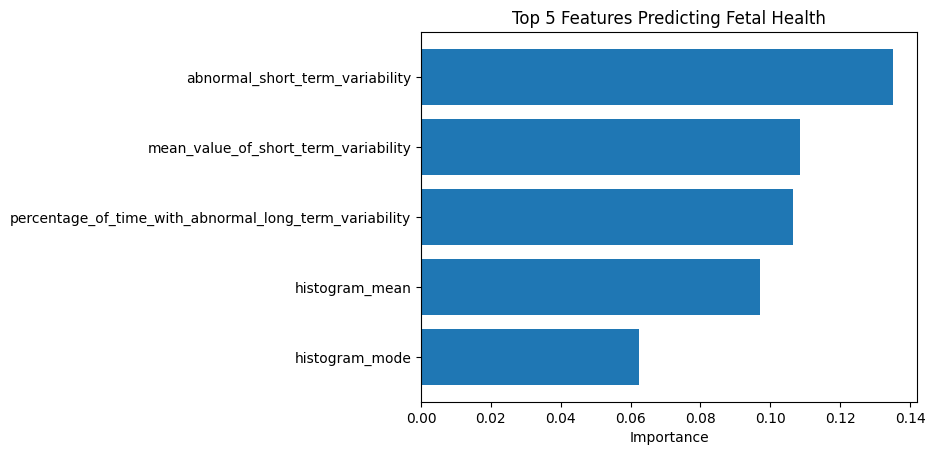

In [31]:
# 21. Optional: Visualize the top 5 important features
top_features = feature_importance_df.head(5)
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 5 Features Predicting Fetal Health')
plt.gca().invert_yaxis()  # So highest importance is on top
plt.show()

**Conclusion:**

The random forest model achieved an accuracy of 95% with a strong precision, recall, and F1-scores across all fetal health categories.  




# Feature Importance Analysis

Goal:
Identifying which cardiotocographic features are most predictive of fetal health using the Random Forest model’s feature importance.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# 22. Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

In [33]:
# 23. Get feature names
feature_names = X.columns

In [37]:
# 24. Sort features by importance (descending)
import numpy as np
indices = np.argsort(importances)[::-1]

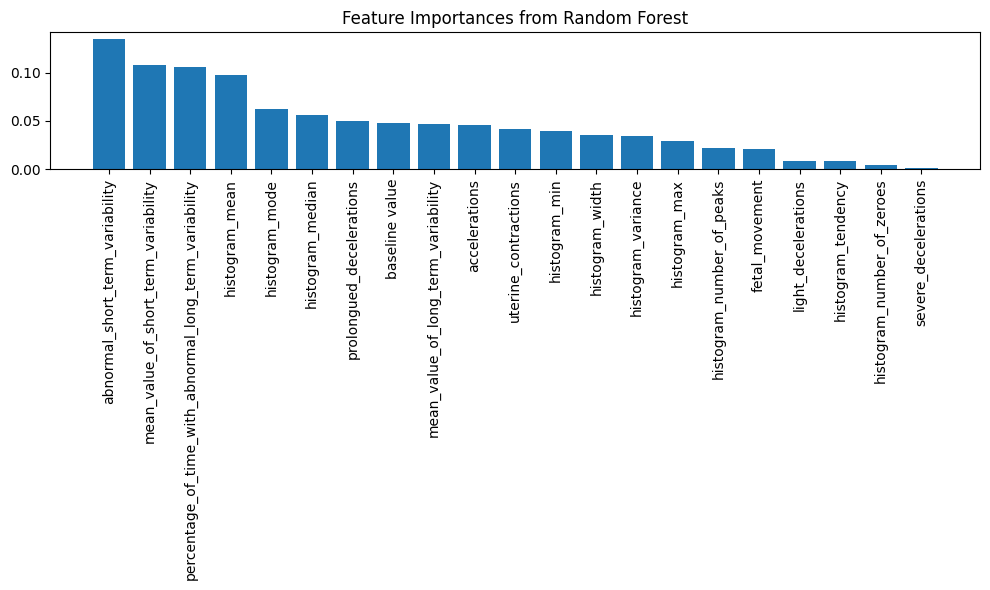

In [38]:
# 25. Plot feature importances
plt.figure(figsize=(10,6))
plt.title("Feature Importances from Random Forest")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

**Summary:**

Our random Forest Model shows which of the cardiotocographic features are most important for predicting fetal health. The top 3 important features were abnormal short-term variability, mean value of short-term variability, and percentage of time with abnormal long-term variability.